In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import pandas as pd

In [2]:
zdata = pd.read_csv('../data/cosmos_3dhst_v4.1.5_catalogs/cosmos_3dhst.v4.1.5.zbest.dat', sep='\t', comment='#')

zdata

,field,phot_id,z_best_s,use_phot,use_zgrism,z_best,z_best_l95,z_best_l68,z_best_u68,z_best_u95
0,cosmos,1,3,0,0,3.0674,3.009,3.020,3.116,3.127
1,cosmos,2,3,0,0,3.2266,3.107,3.176,3.284,3.318
2,cosmos,3,3,1,0,0.8131,0.776,0.792,0.837,0.843
3,cosmos,4,3,1,0,3.0885,1.298,2.487,3.690,4.016
4,cosmos,5,3,1,0,0.5092,0.391,0.468,0.556,0.596
...,...,...,...,...,...,...,...,...,...,...
33874,cosmos,33875,3,1,0,1.1795,1.127,1.147,1.212,1.230
33875,cosmos,33876,3,1,0,1.4356,1.069,1.175,1.610,1.711
33876,cosmos,33877,3,0,0,0.0165,0.010,0.011,0.031,0.035
33877,cosmos,33878,0,0,0,-1.0000,-1.000,-1.000,-1.000,-1.000


In [3]:
sfrdata = pd.read_csv('../data/cosmos_3dhst_v4.1.5_catalogs/cosmos_3dhst.v4.1.5.zbest.sfr', sep='\s+', comment='#')

sfrdata

,id,sfr,sfr_IR,sfr_UV,L_IR,L_UV,flag,z_best,z_type,f24tot,ef24tot,L_1600,L_2800,beta
0,1,214.3400,206.4500,7.887300e+00,1.894000e+12,3.289100e+10,0,3.0670,3,81.110,29.22,3.306500e+09,2.192700e+10,2.37
1,2,191.4300,181.2500,1.018200e+01,1.662900e+12,4.246100e+10,0,3.2270,3,48.120,33.61,8.262000e+09,2.830800e+10,1.19
2,3,2.4763,1.3982,1.078200e+00,1.282700e+10,4.496100e+09,0,0.8131,3,36.060,31.62,1.622200e+09,2.997400e+09,-0.06
3,4,306.6500,304.8200,1.835400e+00,2.796500e+12,7.653700e+09,0,3.0880,3,113.800,41.84,7.822800e+09,5.102500e+09,-1.78
4,5,-99.0000,-99.0000,3.684500e-03,-9.900000e+01,1.536500e+07,2,0.5092,3,-8.207,27.12,7.866800e+04,1.024300e+07,8.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,33875,2.5188,2.5182,5.686400e-04,2.310300e+10,2.371300e+06,0,1.1790,3,21.100,15.55,8.380900e-01,1.580900e+06,26.66
33875,33876,3.5940,3.5706,2.343900e-02,3.275800e+10,9.774200e+07,1,1.4360,3,13.490,20.39,4.205300e+04,6.516100e+07,14.62
33876,33877,-99.0000,-99.0000,1.061600e-11,-9.900000e+01,4.426900e-02,2,0.0165,3,-20.200,21.09,2.770000e-02,2.951200e-02,-99.00
33877,33878,-99.0000,-99.0000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99,-1.0000,0,-4.521,22.63,-9.900000e+01,-9.900000e+01,-99.00


In [4]:
radecdata = pd.read_csv('../data/cosmos_3dhst.v4.1.cats/Catalog/cosmos_3dhst.v4.1.cat', sep='\s+', comment='#')

radecdata

,id,x,y,ra,dec,faper_F160W,eaper_F160W,faper_F140W,eaper_F140W,f_F160W,...,IRAC2_contam,IRAC3_contam,IRAC4_contam,contam_flag,f140w_flag,use_phot,near_star,nexp_f125w,nexp_f140w,nexp_f160w
0,1,10091.6,7283.0,150.071442,2.169014,4.987774,0.180659,-69.75880,-69.75881,7.078528,...,0.458,-99.000,-99.000,1,0,0,0,1.0,0.0,1.0
1,2,10083.4,7285.7,150.071579,2.169060,2.158842,0.165525,-61.84459,-61.84459,3.455845,...,1.744,-99.000,-99.000,1,0,0,0,1.0,0.0,1.0
2,3,9847.2,7529.0,150.075516,2.173114,18.137190,0.045990,-30.69575,-30.69575,58.496120,...,0.004,0.014,0.028,0,0,1,0,6.0,0.0,6.0
3,4,10277.1,7326.9,150.068344,2.169745,0.539666,0.096470,-81.87084,-81.87084,0.652575,...,0.002,-99.000,-99.000,0,0,1,0,2.0,0.0,2.0
4,5,10090.1,7380.9,150.071457,2.170646,0.727406,0.068492,-87.35809,-87.35809,0.824345,...,0.001,-99.000,-99.000,0,0,1,0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,33875,2843.5,30723.6,150.192352,2.559685,1.929434,0.078184,-72.49879,-72.49878,2.634719,...,0.000,-99.000,-99.000,0,0,1,0,2.0,0.0,2.0
33875,33876,2918.4,30715.7,150.191101,2.559553,0.591431,0.078799,-71.78005,-71.78005,0.815710,...,0.011,-99.000,-99.000,0,0,1,0,2.0,0.0,2.0
33876,33877,2439.9,30745.1,150.199081,2.560042,5.154312,0.088160,-73.68423,-73.68423,6.925184,...,0.237,-99.000,-99.000,0,0,0,0,2.0,0.0,2.0
33877,33878,7574.1,30730.3,150.113419,2.559799,2.085383,0.247027,-81.87084,-81.87084,2.521690,...,0.001,-99.000,-99.000,0,0,0,0,0.0,0.0,1.0


In [5]:
mask = (zdata['z_best'] > 0) & (sfrdata['sfr_IR'] > 0)
# mask = np.ones(len(zdata['z_best']), dtype=bool)
data = {'ra': radecdata['ra'][mask], 'dec': radecdata['dec'][mask], 'z': zdata['z_best'][mask], 'sfr_IR': sfrdata['sfr_IR'][mask]}

print(len(data['ra']))

18202


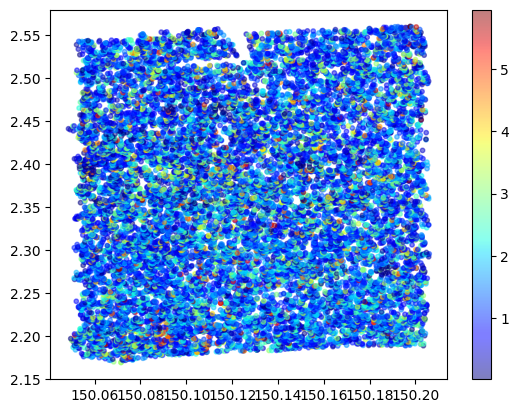

In [6]:
plt.figure()
plt.scatter(data['ra'], data['dec'], c=data['z'], s=10, cmap='jet', alpha=0.5)
plt.colorbar()
plt.show()
plt.close()

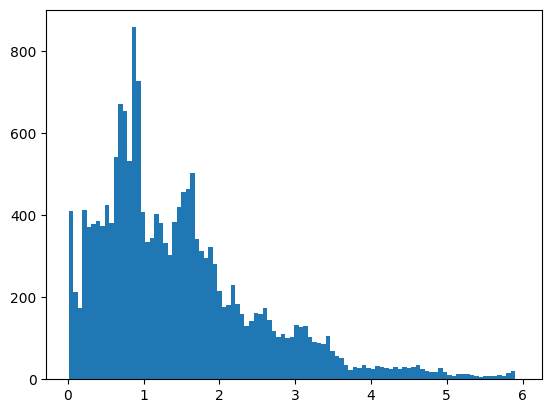

In [7]:
plt.figure()
plt.hist(data['z'], bins=100)
plt.show()
plt.close()

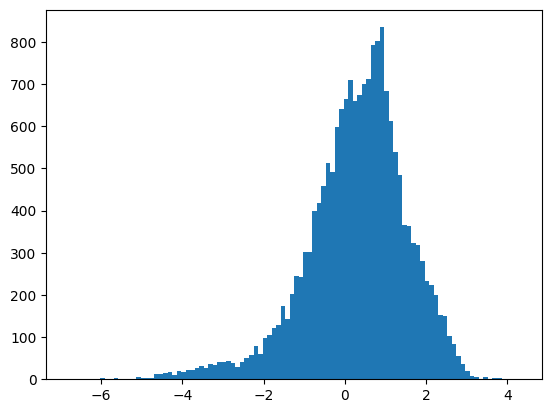

In [8]:
plt.figure()
plt.hist(np.log10(data['sfr_IR']), bins=100)
plt.show()
plt.close()

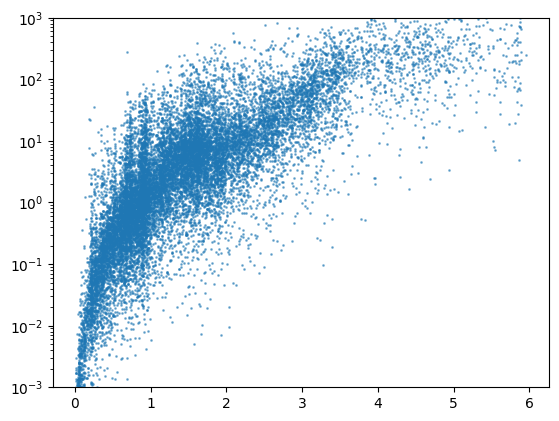

In [9]:
plt.figure()
plt.scatter(data['z'], data['sfr_IR'], s=1, alpha=0.5)
plt.yscale('log')
plt.ylim(1e-3, 1e3)
plt.show()
plt.close()

Set MJD-END to 55733.595211 from DATE-END'. [astropy.wcs.wcs]


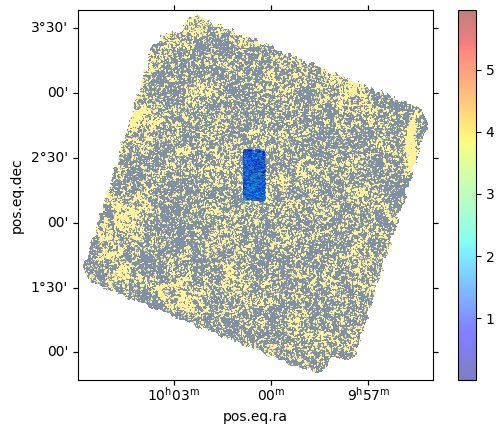

In [10]:
with fits.open('../data/COSMOS/COSMOS-Nest_image_250_SMAP_v6.0.fits') as hdul:
    img = hdul[1].data
    header = hdul[1].header
    wcs = WCS(hdul[1].header)
    # fix by header['CRVAL1']
    
plt.subplot(projection=wcs)
plt.imshow(img, cmap='cividis', origin='lower', vmin=0, vmax=1e-3, alpha=0.5)
plt.scatter(data['ra'], data['dec'],\
    c=data['z'], s=1, cmap='jet', alpha=0.5, transform=plt.gca().get_transform('world'))
plt.colorbar()
plt.show()
plt.close()

In [15]:
np.nanmean(img), np.nanstd(img), np.nanmedian(img)

(8.686904464468148e-05, 0.010514348106917246, -0.0013493305437875067)

Set MJD-END to 55733.595211 from DATE-END'. [astropy.wcs.wcs]


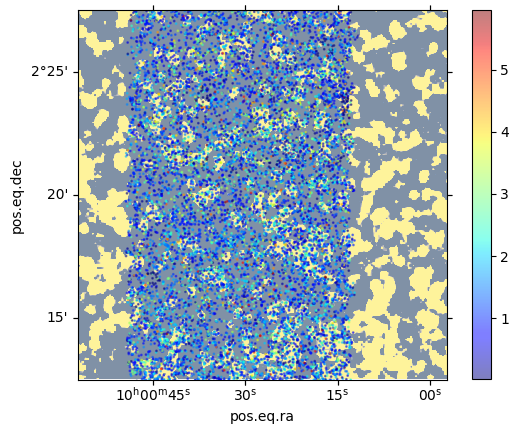

In [11]:
with fits.open('../data/COSMOS/COSMOS-Nest_image_250_SMAP_v6.0.fits') as hdul:
    img = hdul[1].data
    header = hdul[1].header
    wcs = WCS(hdul[1].header)
    # fix by header['CRVAL1']
    
plt.subplot(projection=wcs)
plt.imshow(img, cmap='cividis', origin='lower', vmin=0, vmax=1e-3, alpha=0.5)
plt.scatter(data['ra'], data['dec'],\
    c=data['z'], s=1, cmap='jet', alpha=0.5, transform=plt.gca().get_transform('world'))
plt.ylim(850, 1000)
plt.xlim(750, 900)
plt.colorbar()
plt.show()
plt.close()

In [12]:
header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 1643 /                                                
NAXIS2  =                 1711 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
COMMENT                                                                         
COMMENT  This is a header for an SMAP pipeline product.                         
COMMENT                                                                         
TIMESYS = 'UTC     '           / All dates are in UTC time                      
CREATOR = 'SMAP    '           / User who created this header                   
DATE    = '2015-02-6T10:33:1

0.5326 16.105


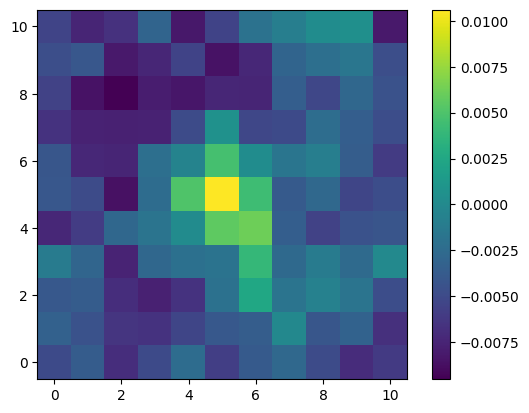

In [24]:
def extract_stamp(fits_file, ra, dec, stamp_size):
    # Open the FITS file
    with fits.open(fits_file) as hdul:
        # Get the WCS information from the header
        wcs = WCS(hdul[1].header)

        # Convert RA, Dec to pixel coordinates
        x, y = wcs.all_world2pix(ra, dec, 0)

        # Calculate the stamp boundaries
        x_min = int(np.round(x - stamp_size))
        x_max = int(np.round(x + stamp_size)) + 1
        y_min = int(np.round(y - stamp_size))
        y_max = int(np.round(y + stamp_size)) + 1
        
        # print(x, y, x_min, x_max, y_min, y_max)
        # print(wcs.all_pix2world(x_min, y_min, 0))

        # Extract the stamp from the data
        stamp = hdul[1].data[y_min:y_max, x_min:x_max]

    return stamp

# Example usage
fits_file = '../data/COSMOS/COSMOS-Nest_image_250_SMAP_v6.0.fits'
while True:
    ind = np.random.choice(data['ra'].index)
    if np.abs(data['z'][ind] - 0.5) < 0.1 and data['sfr_IR'][ind] > 1e1:
        break
print(data['z'][ind], data['sfr_IR'][ind])
ra, dec = data['ra'][ind], data['dec'][ind]
stamp_size = 5  # Adjust the stamp size as needed

extracted_stamp = extract_stamp(fits_file, ra, dec, stamp_size)

# Plot the stamp
plt.imshow(extracted_stamp, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()


In [28]:
mask = (data['z'] > 0.5) & (data['z'] < 0.7) & (data['sfr_IR'] > 3)
print(np.sum(mask))

1689


0.0009667716101168259


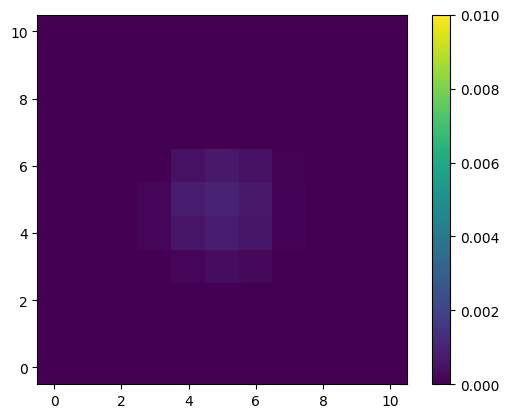

In [29]:
total_avg_stamp = np.zeros((stamp_size*2+1, stamp_size*2+1))
for ind in data['ra'][mask].index:
    ra, dec = data['ra'][ind], data['dec'][ind]
    extracted_stamp = extract_stamp(fits_file, ra, dec, stamp_size)
    total_avg_stamp += extracted_stamp
    
total_avg_stamp /= np.sum(mask)

print(np.nanmax(total_avg_stamp))

plt.imshow(total_avg_stamp, origin='lower', cmap='viridis', vmin=0, vmax=1e-2)
plt.colorbar()
plt.show()
plt.close()

In [248]:
with fits.open('../data/specz_compilation_COSMOS_October23_v1.02_public.fits') as hdul:
    speczdata = hdul[1].data
    speczheader = hdul[1].header

speczdata.columns

ColDefs(
    name = 'Id spec-z'; format = 'K'
    name = 'Id original'; format = '20A'
    name = 'ra original'; format = 'D'
    name = 'dec original'; format = 'D'
    name = 'ra corrected'; format = 'D'
    name = 'dec corrected'; format = 'D'
    name = 'Priority'; format = 'K'
    name = 'spec-z'; format = 'D'
    name = 'flag'; format = 'K'
    name = 'Confidence level'; format = 'K'
    name = 'survey'; format = 'K'
    name = 'compilation year'; format = 'K'
    name = 'public/private'; format = 'K'
    name = 'Id Classic'; format = 'K'
    name = 'ra Classic'; format = 'D'
    name = 'dec Classic'; format = 'D'
    name = 'Id Farmer'; format = 'K'
    name = 'ra Farmer'; format = 'D'
    name = 'dec Farmer'; format = 'D'
    name = 'Id COSMOS09'; format = 'K'
    name = 'ra COSMOS09'; format = 'D'
    name = 'dec COSMOS09'; format = 'D'
    name = 'photo-z'; format = 'D'
    name = 'photo-z type'; format = 'K'
)

In [259]:
mask = (speczdata['flag'] == 3) | (speczdata['flag'] == 4)
print(np.sum(mask))

46547


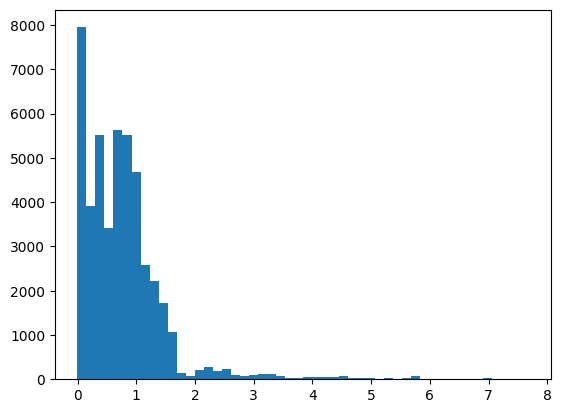

In [262]:
plt.figure()
plt.hist(speczdata['spec-z'][mask], bins=50)
plt.show()
plt.close()

In [243]:
250/158 - 1, 350/158 - 1 

(0.5822784810126582, 1.2151898734177213)

In [109]:
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
zlow, zupp = 0.52, 1.67
zmid = (zlow + zupp) / 2

cosmo.luminosity_distance(zmid).to('Mpc'), (cosmo.kpc_proper_per_arcmin(zmid)).to('Mpc/deg')

(<Quantity 7594.99775652 Mpc>, <Quantity 30.2020876 Mpc / deg>)

In [111]:
(cosmo.kpc_proper_per_arcmin(zmid)).to('Mpc/deg') ** 2 * 0.2 * u.deg * u.deg *\
    (cosmo.comoving_distance(zupp) - cosmo.comoving_distance(zlow)).to('Mpc')

<Quantity 505335.44284035 Mpc3>

In [117]:
(cosmo.comoving_volume(zupp) - cosmo.comoving_volume(zlow)) * 0.2 * (np.pi/180)**2 / (4*np.pi) / 1e6

<Quantity 2.05665941 Mpc3>